In [111]:
import pandas as pd

# Load the dataset
file_path = 'data.csv'
df = pd.read_csv(file_path)


In [112]:
# Display the first few rows of the dataset
df.head()

,Unnamed: 0,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# **Data Preprocessing**

In [113]:
# Drop the columns with NaN values
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [114]:
# Displaying the first 5 rows to get basic understanding of the data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [115]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [116]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

In [117]:
# Drop rows with missing values
df.dropna(inplace=True)

In [118]:
df.columns = ['label', 'message']

In [119]:
# Encode the labels (spam/ham)
label_encoder = LabelEncoder()

In [120]:
df['label']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [121]:
df['label'] = label_encoder.fit_transform(df['label'])

In [124]:
# Split data into features and labels
X = df['message']
y = df['label']

In [125]:
# Convert text data to numerical data using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

In [132]:
# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Feature Seletion
 For feature selection, we'll use the SelectKBest method to select the best features based on a statistical test.

In [137]:
from sklearn.feature_selection import SelectKBest, chi2

# Select the best features using chi-squared test
selector = SelectKBest(chi2, k=1000)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)


# Applying Spam Filter Algorithms
We'll use three different algorithms: Naive Bayes, Multinomial Naive Bayes, and J48 (Decision Tree). Note: For J48, we can use the DecisionTreeClassifier from sklearn.

In [96]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the algorithms

In [97]:
gnb = GaussianNB()

In [98]:
mnb = MultinomialNB()

In [99]:
dtc = DecisionTreeClassifier()

# Train and test the algorithms
GaussianNB requires dense matrix

In [100]:
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()


# Naive Bayes

In [101]:
gnb.fit(X_train_dense, y_train)
y_pred_gnb = gnb.predict(X_test_dense)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
cm_gnb = confusion_matrix(y_test, y_pred_gnb)

# Multinomial Naive Bayes

In [102]:
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
cm_mnb = confusion_matrix(y_test, y_pred_mnb)

# Decision Tree (J48)

In [103]:
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
cm_dtc = confusion_matrix(y_test, y_pred_dtc)


# Print the results

In [104]:
print(f"Naive Bayes Accuracy: {accuracy_gnb}")
print(f"Naive Bayes Confusion Matrix:\n{cm_gnb}\n")

print(f"Multinomial Naive Bayes Accuracy: {accuracy_mnb}")
print(f"Multinomial Naive Bayes Confusion Matrix:\n{cm_mnb}\n")

print(f"Decision Tree (J48) Accuracy: {accuracy_dtc}")
print(f"Decision Tree (J48) Confusion Matrix:\n{cm_dtc}\n")


Naive Bayes Accuracy: 0.9748803827751196
Naive Bayes Confusion Matrix:
[[1428   25]
 [  17  202]]

Multinomial Naive Bayes Accuracy: 0.9778708133971292
Multinomial Naive Bayes Confusion Matrix:
[[1442   11]
 [  26  193]]

Decision Tree (J48) Accuracy: 0.9688995215311005
Decision Tree (J48) Confusion Matrix:
[[1439   14]
 [  38  181]]



# Confusion Matrix and Accuracy

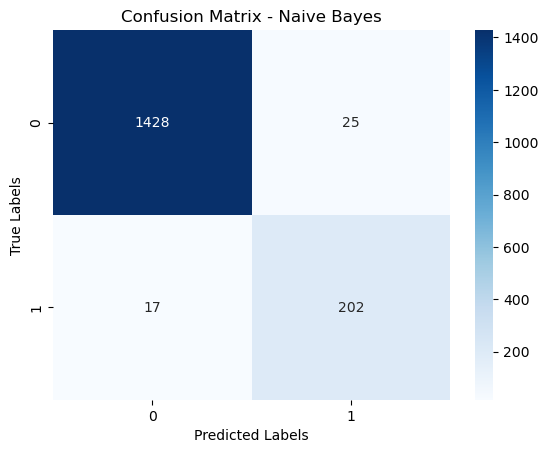

In [106]:
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

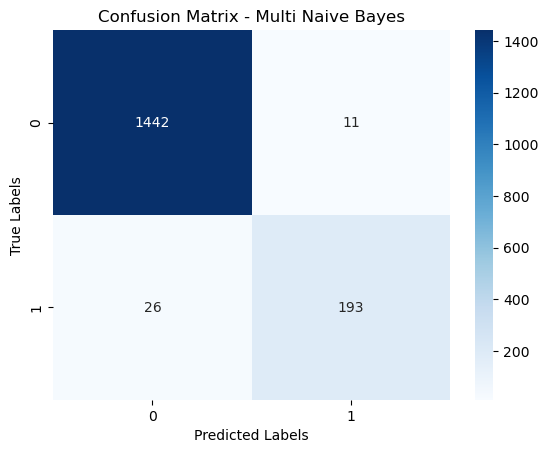

In [107]:
sns.heatmap(cm_mnb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Multi Naive Bayes')
plt.show()

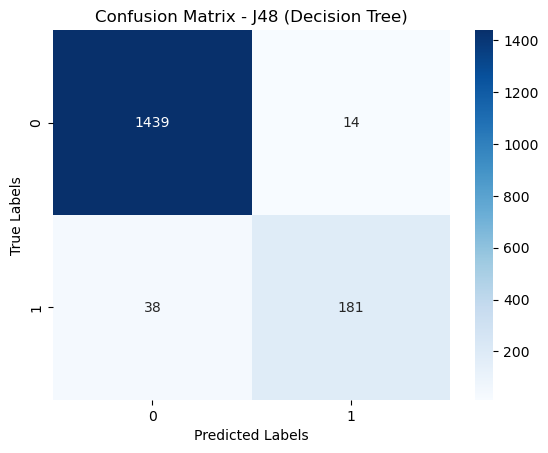

In [108]:
sns.heatmap(cm_dtc, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - J48 (Decision Tree)')
plt.show()

In [109]:
print(f"Naive Bayes Accuracy: {accuracy_gnb}")
print(f"Multinomial Naive Bayes Accuracy: {accuracy_mnb}")
print(f"Decision Tree (J48) Accuracy: {accuracy_dtc}")

Naive Bayes Accuracy: 0.9748803827751196
Multinomial Naive Bayes Accuracy: 0.9778708133971292
Decision Tree (J48) Accuracy: 0.9688995215311005
